# For each feature, test the sample model

Setting
- Extract existing feature set: 14 features (ZC / SSC / WL / WAMP / MAV / MSE / RMS / V3 / LD / DASDV / MFL / MPR / MAVS / WMAV)
- Subject: Hunmin / Xianyu
    1. Do intra-subject setting (H / X indepedently)
- Inter-session setting
    - Feature 1. Inter-session using centralized training
    - Feature 2. Inter-session using centralized training
    - ...

Questions
- Does feature set works differently per person?
- Does feature set works differently per session? (identical person)
- Is combining feature set good?
- Ultimately, which feature set we should select?

In [1]:
import sys
sys.path.append('../')
sys.path.append('../Feature-wise-analysis')
import config
import Models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import Trainer

In [2]:
baseline_K_val = [18] #Train ~18 session data, test with 19~
K = baseline_K_val[0]

model_acc = []
trainer = Trainer.TremorModelTrainer(config, subject="Hunmin")
X_train, y_train, X_test, y_test = trainer.return_K_data(K, verbose=False)

(151851, 4, 14, 1) (151851,)


In [5]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.V1_2DCNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 91.51%
Maximum validation accuracy : 88.65%
Accuracy of test dataset using model V0: 88.3978%


In [8]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.ResNetStyle_CNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 89.94%
Maximum validation accuracy : 88.61%
Accuracy of test dataset using model V0: 87.9323%


In [6]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.InceptionStyle_CNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 90.59%
Maximum validation accuracy : 88.62%
Accuracy of test dataset using model V0: 87.7854%


In [7]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.SeparableCNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 87.97%
Maximum validation accuracy : 87.68%
Accuracy of test dataset using model V0: 86.8611%


In [4]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.SE_CNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 91.13%
Maximum validation accuracy : 88.88%
Accuracy of test dataset using model V0: 88.4872%


In [5]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.Attention_CNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 91.1%
Maximum validation accuracy : 88.65%
Accuracy of test dataset using model V0: 87.8395%


In [6]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.Gated_CNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 90.86%
Maximum validation accuracy : 88.53%
Accuracy of test dataset using model V0: 88.1070%


In [7]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.Hybrid_CNN)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 88.03%
Maximum validation accuracy : 87.43%
Accuracy of test dataset using model V0: 86.8174%


In [11]:
import importlib
importlib.reload(Models)

X_train_rnn = X_train.reshape(-1, 4, 14)  # drop the last channel dimension
X_test_rnn = X_test.reshape(-1, 4, 14)

acc, _ = trainer.train_multiple_dataset(X_train_rnn, y_train, X_test_rnn, y_test, Models.BiLSTM_Attention_14features)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 92.54%
Maximum validation accuracy : 89.05%
Accuracy of test dataset using model V0: 89.0031%


In [13]:
acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.Conv2D_then_LSTM)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 91.87%
Maximum validation accuracy : 89.15%
Accuracy of test dataset using model V0: 88.9382%


In [18]:
import importlib
importlib.reload(Models)

acc, _ = trainer.train_multiple_dataset(X_train_rnn, y_train, X_test_rnn, y_test, Models.Transformer_Model)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 88.39%
Maximum validation accuracy : 87.83%
Accuracy of test dataset using model V0: 87.2638%


In [20]:
import importlib
importlib.reload(Models)

acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.Hybrid_CNN_Transformer)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 90.16%
Maximum validation accuracy : 87.95%
Accuracy of test dataset using model V0: 87.8187%


In [24]:
import importlib
importlib.reload(Models)

acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test, Models.V1_2DCNN_with_many_params)
model_acc.append(acc)

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 93.31%
Maximum validation accuracy : 89.0%
Accuracy of test dataset using model V0: 88.9981%


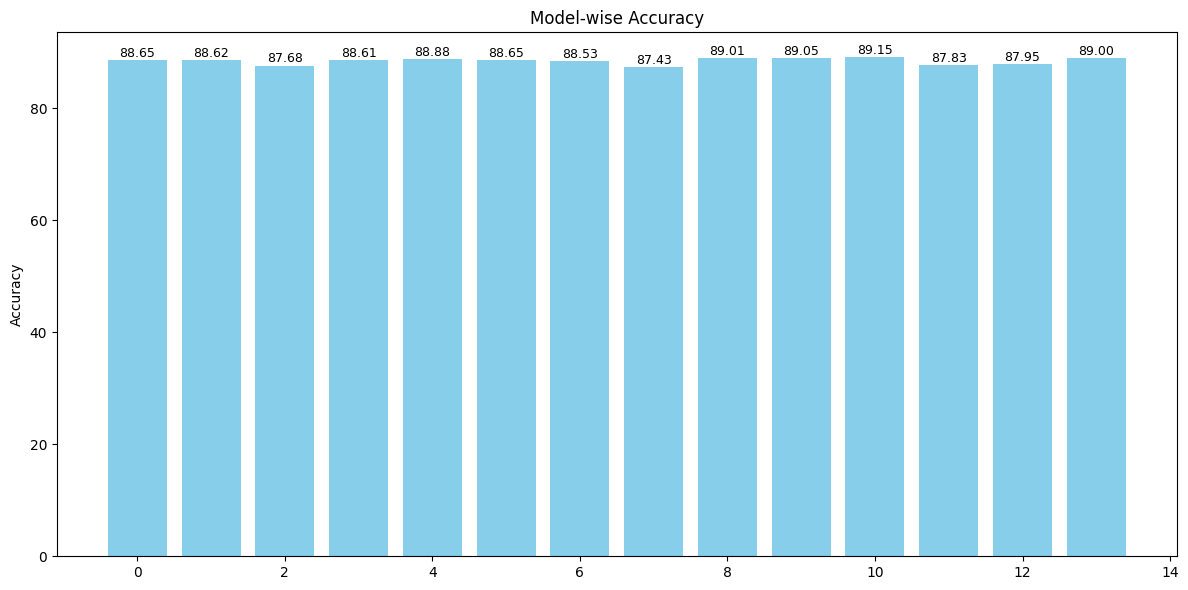

In [25]:
model_names = ['2DCNN with Adam', 'ResNet', 'Inception', 'SeperableCNN', 'SE-CNN', 'Attention-CNN', 'Gated-CNN', 'Hybrid-CNN', 'BiLSTM_Attention', 'Conv2+LSTM', 'Transformer', 'Transformer-CNN', '2DCNN with Many params']

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(model_acc)), model_acc, color='skyblue')
#plt.xticks(range(len(model_acc)), model_names, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model-wise Accuracy')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()